# Does Melting Matter? Investigating Annual Algal Blooms in Western Alaskan Waters

## Meredith Kime: RCES Final 2022

## Background: 
### The Arctic is facing warming rates twice that of the global average, increasing threats to ecosystem dynamics. Under heightend warming, it is expected that sea-ice concentration and extent will continue to decrease. One of the most fundamental events within marine ecosystems are seasonal phytoplankton blooms. During these blooms, as more light becomes available, an eruption of phytoplankton growth occurs, serving as the foundation of the marine food web. With sea-ice melting earlier in the season, the timing of phytoplankton blooms will follow suit. This shift in timing however may have other adverse effects on lower trophic levels whose phenology is not dependent on increased sunlight into the photic zone.

### Using monthly chl-a satellite data as a proxy for phytoplankton abundance, and sea-ice concentrations satellite data, the relationship between sea-ice and chlorophyll-a concentrations will be evaluated. 

![Baltic Phytoplankton Bloom](baltic_bloom.jpeg)
(https://climate.nasa.gov/climate_resources/170/summer-blooms-in-the-baltic/)

## Research Questions: 
### 1. Does the timing of sea-ice melt reflect formation of phytoplankton bloom?
### 2. How do regional/coastal analyses compare to overall trends?

## Data:

### [Chlorophyll-a Data](https://polarwatch.noaa.gov/erddap/griddap/erdMH1chla1day)


### [Sea-Ice Data](https://polarwatch.noaa.gov/erddap/griddap/nsidcCDRice_nh_grid.html)


### [Sea-Ice Lat/Lon Grid](https://polarwatch.noaa.gov/erddap/griddap/nsidcCDRice_nh_grid.html)

## Import tools needed

In [331]:
import cartopy.crs as ccrs
import cartopy
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.frigure_format ='retina'
import pandas as pd
import numpy as np
import xarray as xr

In [332]:
from erddapy import ERDDAP

# Import Data

## Monthly Chlorophyll-a Data

In [333]:
#https://polarwatch.noaa.gov/erddap/griddap/erdMH1chla1day.nc?chlorophyll%5B(2017-01-01T12:00:00Z):1:(2022-07-27T12:00:00Z)%5D%5B(70.020836):1:(54.020832)%5D%5B(-169.97917):1:(-141.97917)%5D

e = ERDDAP(
  server="https://polarwatch.noaa.gov/erddap",
  protocol= "griddap",
)

In [334]:
e.dataset_id = "erdMH1chla1day"

#daily data: "erdMH1chla1day"
#monthly data: "erdMH1chlamday"

In [335]:
e.griddap_initialize()

import json
print(f'variables in this dataset:\n\n{e.variables}')
print(f'\nconstraints for this dataset:\n\n{json.dumps(e.constraints, indent=1)}')

variables in this dataset:

['chlorophyll']

constraints for this dataset:

{
 "time>=": "2022-07-27T12:00:00Z",
 "time<=": "2022-07-27T12:00:00Z",
 "time_step": 1,
 "latitude>=": 89.979164,
 "latitude<=": -89.97917,
 "latitude_step": 1,
 "longitude>=": -179.97917,
 "longitude<=": 179.97917,
 "longitude_step": 1
}


In [336]:
e.constraints['time>='] = '2017-01-01T00:00:00Z'
e.constraints['time<='] = '2022-05-16T12:00:00Z'
e.constraints['latitude>='] = 50.0
e.constraints['latitude<='] = 80.0
e.constraints['longitude>='] = -170.0
e.constraints['longitude<='] = -145.0
e.constraints['latitude_step'] = 10
e.constraints['longitude_step'] = 10

In [337]:
ds_chl = e.to_xarray()
ds_chl

<xarray.Dataset>
Dimensions:      (time: 1932, latitude: 73, longitude: 61)
Coordinates:
  * time         (time) datetime64[ns] 2017-01-01T12:00:00 ... 2022-05-16T12:...
  * latitude     (latitude) float32 80.02 79.6 79.19 78.77 ... 50.85 50.44 50.02
  * longitude    (longitude) float32 -170.0 -169.6 -169.1 ... -145.4 -145.0
Data variables:
    chlorophyll  (time, latitude, longitude) float32 ...
Attributes: (12/51)
    _lastModified:                     2022-07-28T06:15:18.000Z
    cdm_data_type:                     Grid
    Conventions:                       CF-1.6, COARDS, ACDD-1.3
    creator_email:                     data@oceancolor.gsfc.nasa.gov
    creator_name:                      NASA/GSFC/OBPG
    creator_type:                      group
    ...                                ...
    temporal_range:                    day
    testOutOfDate:                     now-30days
    time_coverage_end:                 2022-05-16T12:00:00Z
    time_coverage_start:               2017-01-01T12:00:00Z
    title:                             Chlorophyll-a, Aqua MODIS, NPP, L3SMI,...
    Westernmost_Easting:               -169.97917

# Monthly Northern Hemisphere Sea Ice Data

## Import and load ERDDAP Lat/Lon Data

In [338]:
e = ERDDAP(
    server='https://polarwatch.noaa.gov/erddap',
    protocol='griddap')

e.dataset_id = 'nsidcCDRice_nh_grid'
e.griddap_initialize()

In [339]:
import json
print(f'variables in this dataset:\n\n{e.variables}')
print(f'\nconstraints for this dataset:\n\n{json.dumps(e.constraints, indent=1)}')

variables in this dataset:

['longitude', 'latitude']

constraints for this dataset:

{
 "ygrid>=": 5837500.0,
 "ygrid<=": -5337500.0,
 "ygrid_step": 1,
 "xgrid>=": -3837500.0,
 "xgrid<=": 3737500.0,
 "xgrid_step": 1
}


In [340]:
#Create lat/lon xarray
ds_ll = e.to_xarray()
#ds_ll.load()

## Import ERDDAP Northern Hemisphere Sea Ice Data

In [341]:
e.dataset_id='nsidcG02202v4nh1day'

#monthly: 'nsidcG02202v4nhmday'
#daily: nsidcG02202v4nh1day
e.griddap_initialize()
print(f'variables in this dataset:\n\n{e.variables}')
print(f'\nconstraints for this dataset:\n\n{json.dumps(e.constraints, indent=1)}'
)

variables in this dataset:

['cdr_seaice_conc', 'melt_onset_day_cdr_seaice_conc', 'nsidc_bt_seaice_conc', 'nsidc_nt_seaice_conc', 'qa_of_cdr_seaice_conc', 'spatial_interpolation_flag', 'stdev_of_cdr_seaice_conc', 'temporal_interpolation_flag']

constraints for this dataset:

{
 "time>=": "2022-05-31T00:00:00Z",
 "time<=": "2022-05-31T00:00:00Z",
 "time_step": 1,
 "ygrid>=": 5837500.0,
 "ygrid<=": -5337500.0,
 "ygrid_step": 1,
 "xgrid>=": -3837500.0,
 "xgrid<=": 3737500.0,
 "xgrid_step": 1
}


In [342]:
e.variables = ['cdr_seaice_conc'] 
e.constraints['time>='] = '2017-01-01T00:00:00Z'

In [343]:
#Load to an xarray
ds = e.to_xarray()

In [344]:
#Merge lat/lon and sea ice data sets
ds_ice = xr.merge([ds, ds_ll])
ds_ice = ds_ice.set_coords(['latitude', 'longitude'])

# Figure 1.  Mean Chlorophyll-a  and Sea Ice Concentrations (2017-2022)

In [345]:
#Slice out Alaska lat/lon
ice_conc = ds_ice.cdr_seaice_conc.where((ds_ice.latitude>=54) & (ds_ice.latitude <=70)&(ds_ice.longitude>=-169)
                                      &(ds_ice.longitude<=-141)).mean(dim='time')

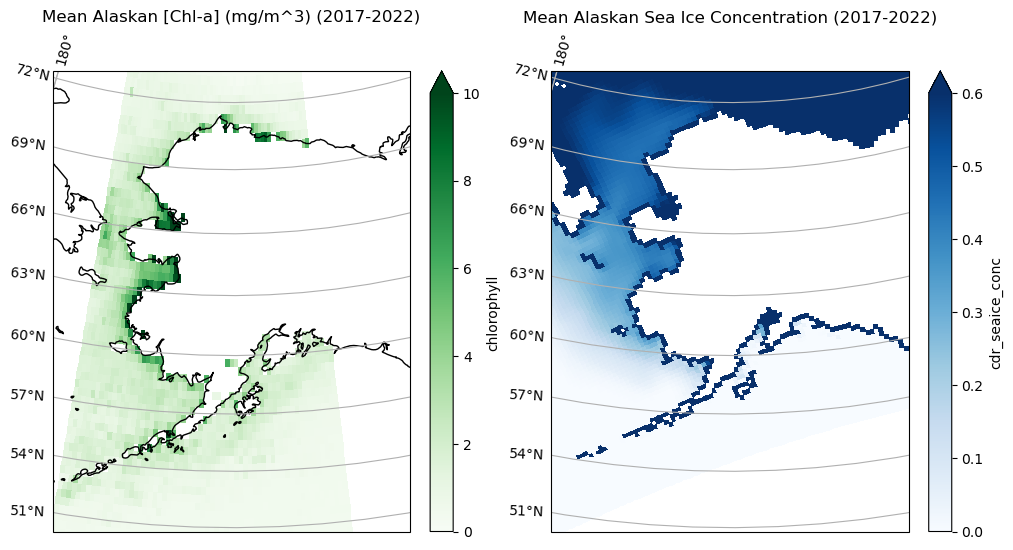

In [471]:
fig=plt.figure(figsize=(10,10),constrained_layout=True)
gs = fig.add_gridspec(2,2, width_ratios=[1,1], height_ratios=[7, 7])

#Chl-a Data
extent_a = [-170, -140, 50, 73]
proj_a =ccrs.LambertConformal(central_longitude=np.mean(extent_a[:2]),central_latitude=np.mean(extent_a[2:]))

ax1 = fig.add_subplot(gs[0], projection=proj_a)                  
ax1.set_extent((extent_a), ccrs.PlateCarree())
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
ax1.coastlines()

#Plot chl data
chl_mean = ds_chl.chlorophyll.mean(dim='time')
chl_mean.plot(transform=ccrs.PlateCarree(), vmin=0,vmax=10, cmap='Greens',ax=ax1)

ax1.set_title('Mean Alaskan [Chl-a] (mg/m^3) (2017-2022)')

#Ice data
extent_b = [-170, -140, 50, 73]
proj_b = ccrs.LambertConformal(central_longitude=np.mean(extent_b[:2]), central_latitude=np.mean(extent_b[2:]))

ax2 = fig.add_subplot(gs[1], projection=proj_b)
ax2.set_extent((extent_b), ccrs.PlateCarree())
gl2 = ax2.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False

#Plot ice data
ice_mean = ds_ice.cdr_seaice_conc.mean(dim='time')
ice_mean.plot(transform=ccrs.NorthPolarStereo(central_longitude=-45),vmin=0,vmax=0.6, cmap='Blues',ax=ax2)
                      
ax2.set_title('Mean Alaskan Sea Ice Concentration (2017-2022)');

## Figure 2. Compare timeseries

In [347]:
alaska_ice = ds_ice.cdr_seaice_conc.where((ds_ice.latitude>=54) & (ds_ice.latitude <=70)&(ds_ice.longitude>=-169)
                                      &(ds_ice.longitude<=-141))

In [415]:
ice_space_mean = alaska_ice.mean(dim=['xgrid', 'ygrid'])
ice_space_mm = ice_space_mean.groupby('time.month').mean(skipna=True)

In [414]:
chl_space_mean = ds_chl.mean(dim=['longitude','latitude'])
chl_space_mm = chl_space_mean.groupby('time.month').mean(skipna=True)

In [351]:
np.seterr(invalid='ignore')

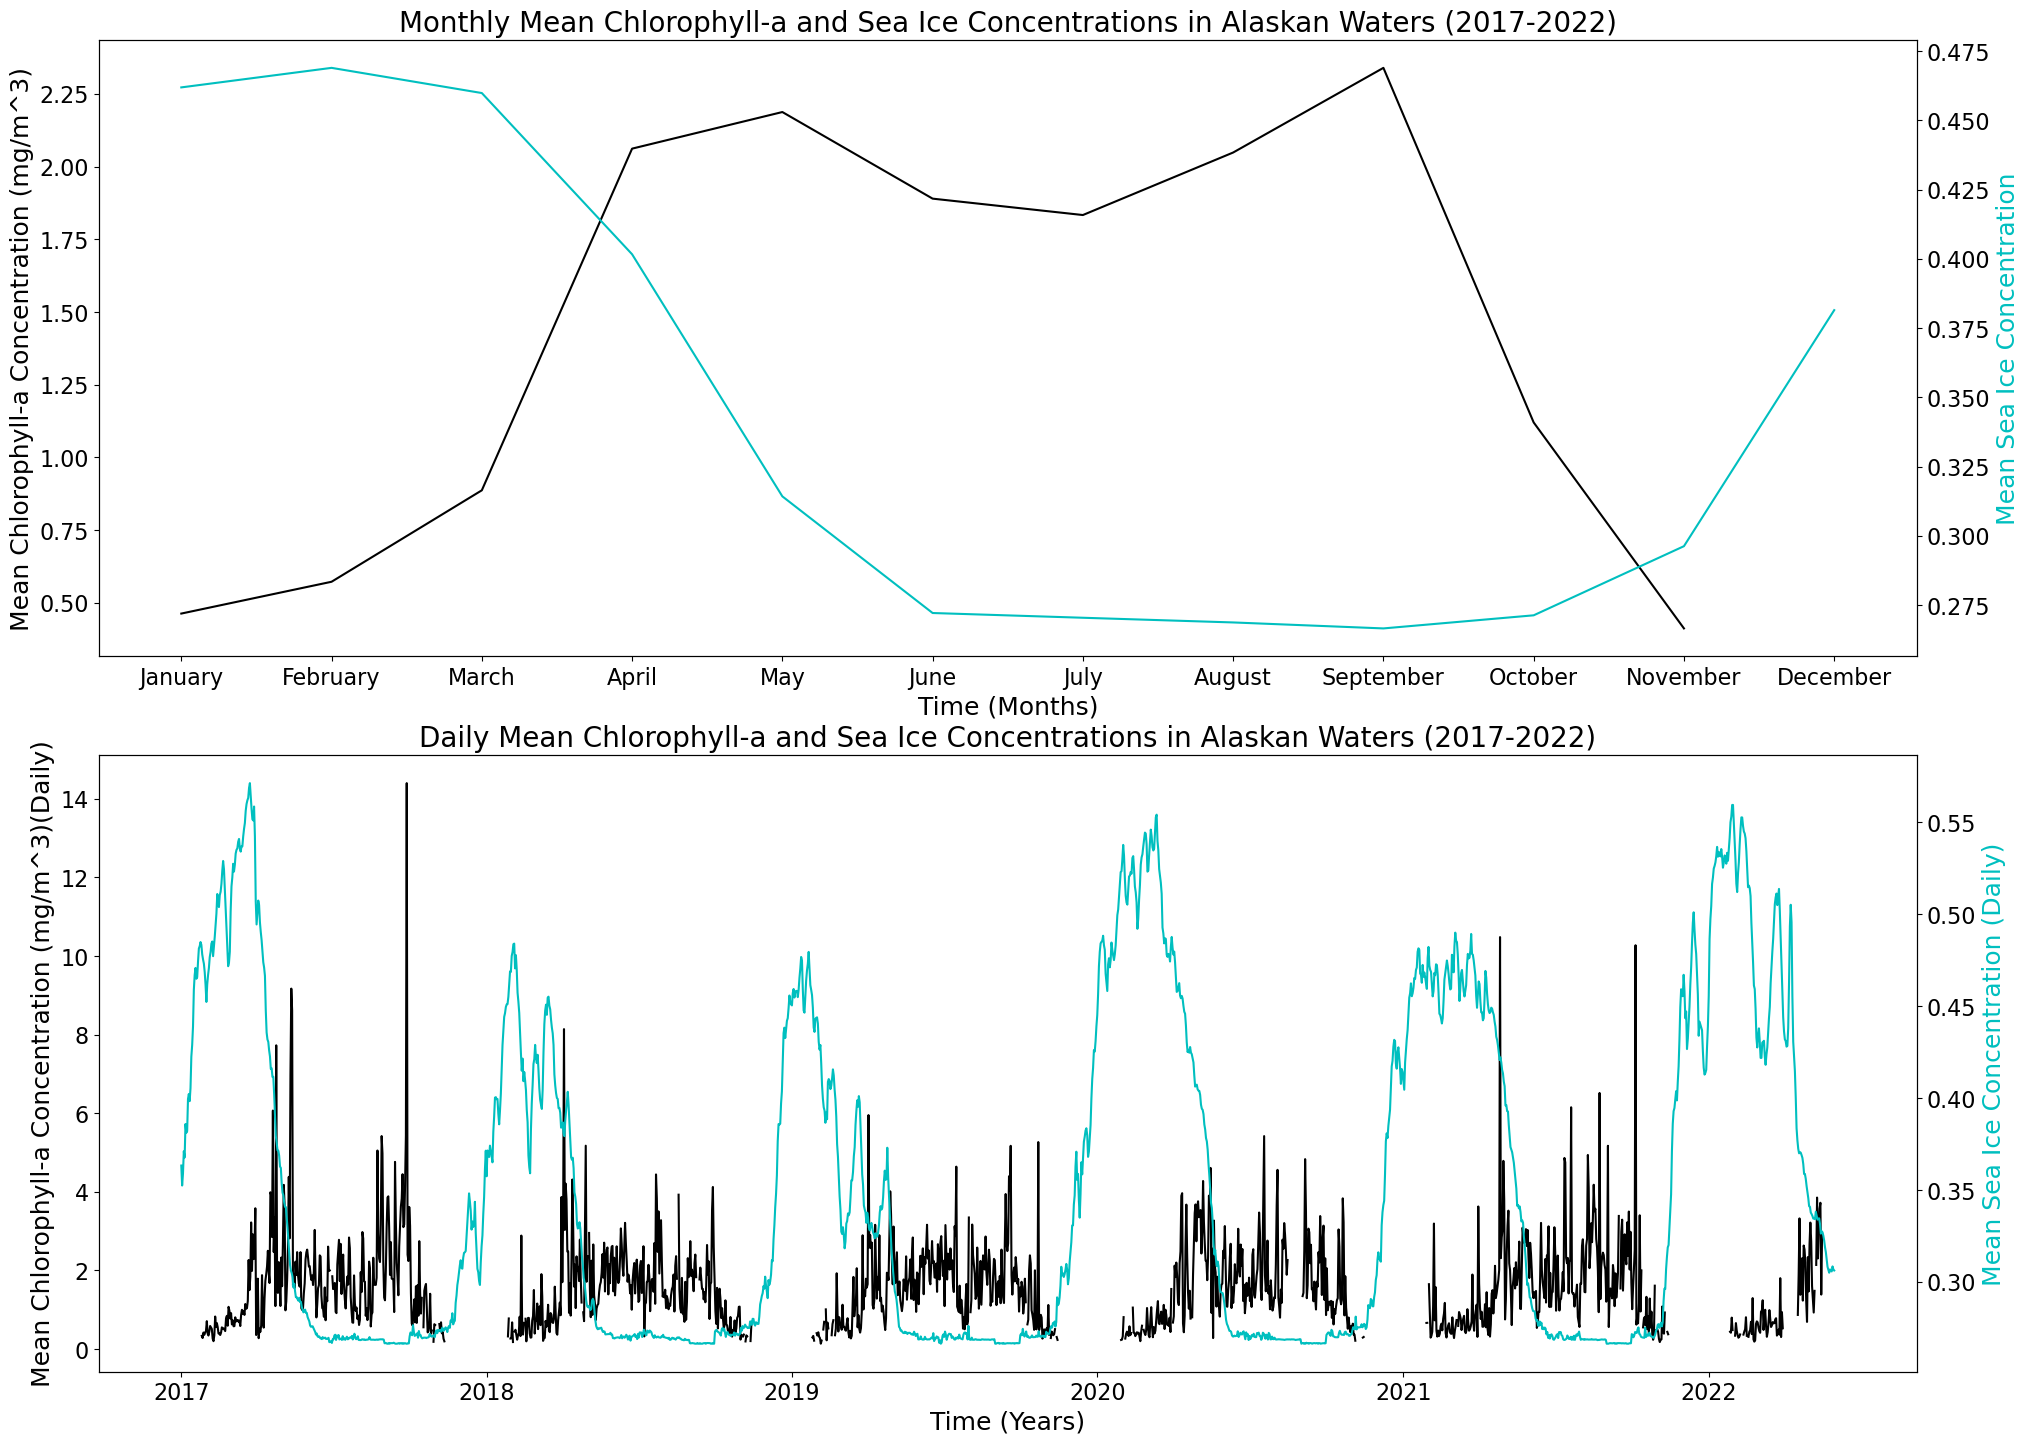

In [435]:
fig, ax = plt.subplots(nrows=2, figsize=(20,15))
fig.tight_layout(pad=5)
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 

ax[0].plot(month, chl_space_mm.chlorophyll, color='k')
ax[0].set_xlabel('Time (Months)',fontsize=18)
ax[0].set_ylabel('Mean Chlorophyll-a Concentration (mg/m^3)',color='k',fontsize=18)
ax[0].set_title('Monthly Mean Chlorophyll-a and Sea Ice Concentrations in Alaskan Waters (2017-2022)',fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=16)

add_ax1 = ax[0].twinx()
add_ax1.plot(month, ice_space_mm,color='c')
add_ax1.set_ylabel('Mean Sea Ice Concentration',color='c', fontsize=18)
add_ax1.tick_params(axis='y', which='major', labelsize=16)



ax[1].plot(chl_space_mean.time, chl_space_mean.chlorophyll, color='k')

ax[1].set_xlabel('Time (Years)',fontsize=18)
ax[1].set_ylabel('Mean Chlorophyll-a Concentration (mg/m^3)(Daily)',color='k',fontsize=18)
ax[1].set_title('Daily Mean Chlorophyll-a and Sea Ice Concentrations in Alaskan Waters (2017-2022)',fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=16)


add_ax2=ax[1].twinx()
add_ax2.plot(ice_space_mean.time, ice_space_mean,color='c')
add_ax2.set_ylabel('Mean Sea Ice Concentration (Daily)',color='c', fontsize=18)
add_ax2.tick_params(axis='y', which='major', labelsize=16)
add_ax2.tick_params(axis='x', rotation = 45)

### Notice that 2018 was a record low year for ice concentrations, and the high chlorophyll abundance reflects that. 

# Yearly Analysis

## Slice out yearly data for both data sets

In [358]:
chl_2017 = ds_chl.sel(time=slice('2017-01-01', '2017-12-31'))#.mean(dim=['longitude', 'latitude'])
ice_2017 = alaska_ice.sel(time=slice('2017-01-01', '2017-12-31')).mean(dim=['xgrid', 'ygrid'])

In [359]:
chl_2018 = ds_chl.sel(time=slice('2018-01-01', '2018-12-31'))#.mean(dim=['longitude', 'latitude'])
ice_2018 = alaska_ice.sel(time=slice('2018-01-01', '2018-12-31')).mean(dim=['xgrid', 'ygrid'])

In [360]:
chl_2019 = ds_chl.sel(time=slice('2019-01-01','2019-12-31'))#.mean(dim=['longitude', 'latitude'])
ice_2019 = alaska_ice.sel(time=slice('2019-01-01', '2019-12-31')).mean(dim=['xgrid', 'ygrid'])

In [361]:
chl_2020 = ds_chl.sel(time=slice('2020-01-01','2020-12-31'))#.mean(dim=['longitude', 'latitude'])
ice_2020 = alaska_ice.sel(time=slice('2020-01-01', '2020-12-31')).mean(dim=['xgrid', 'ygrid'])

In [362]:
chl_2021 = ds_chl.sel(time=slice('2021-01-01','2021-12-31'))#.mean(dim=['longitude', 'latitude'])
ice_2021 = alaska_ice.sel(time=slice('2021-01-01', '2021-12-31')).mean(dim=['xgrid', 'ygrid'])

In [363]:
chl_2022 = ds_chl.sel(time=slice('2022-01-01','2022-07-27'))#.mean(dim=['longitude', 'latitude'])
ice_2022 = alaska_ice.sel(time=slice('2022-01-01', '2022-05-16')).mean(dim=['xgrid', 'ygrid'])

In [366]:
chl_max = ds_chl.where(ds_chl==ds_chl.max(), drop=True).squeeze()

# Summer Analysis

In [436]:
#Slice out summer months
#Ice data
s_ice_2017 = alaska_ice.sel(time=slice('2017-04-01', '2017-08-31')).mean(dim=['xgrid', 'ygrid'])
s_ice_2018 = alaska_ice.sel(time=slice('2018-04-01', '2018-08-31')).mean(dim=['xgrid', 'ygrid'])
s_ice_2019 = alaska_ice.sel(time=slice('2019-04-01', '2019-08-31')).mean(dim=['xgrid', 'ygrid'])
s_ice_2020 = alaska_ice.sel(time=slice('2020-04-01', '2020-08-31')).mean(dim=['xgrid', 'ygrid'])
s_ice_2021 = alaska_ice.sel(time=slice('2021-04-01', '2021-08-31')).mean(dim=['xgrid', 'ygrid'])

#Chl data
s_chl_2017 = ds_chl.sel(time=slice('2017-04-01', '2017-08-31')).mean(dim=['longitude', 'latitude'])
s_chl_2018 = ds_chl.sel(time=slice('2018-04-01', '2018-08-31')).mean(dim=['longitude', 'latitude'])
s_chl_2019 = ds_chl.sel(time=slice('2019-04-01', '2019-08-31')).mean(dim=['longitude', 'latitude'])
s_chl_2020 = ds_chl.sel(time=slice('2020-04-01', '2020-08-31')).mean(dim=['longitude', 'latitude'])
s_chl_2021 = ds_chl.sel(time=slice('2021-04-01', '2021-08-31')).mean(dim=['longitude', 'latitude'])

# Figure 3. Summer mean sea ice and chl-a timeseries analysis

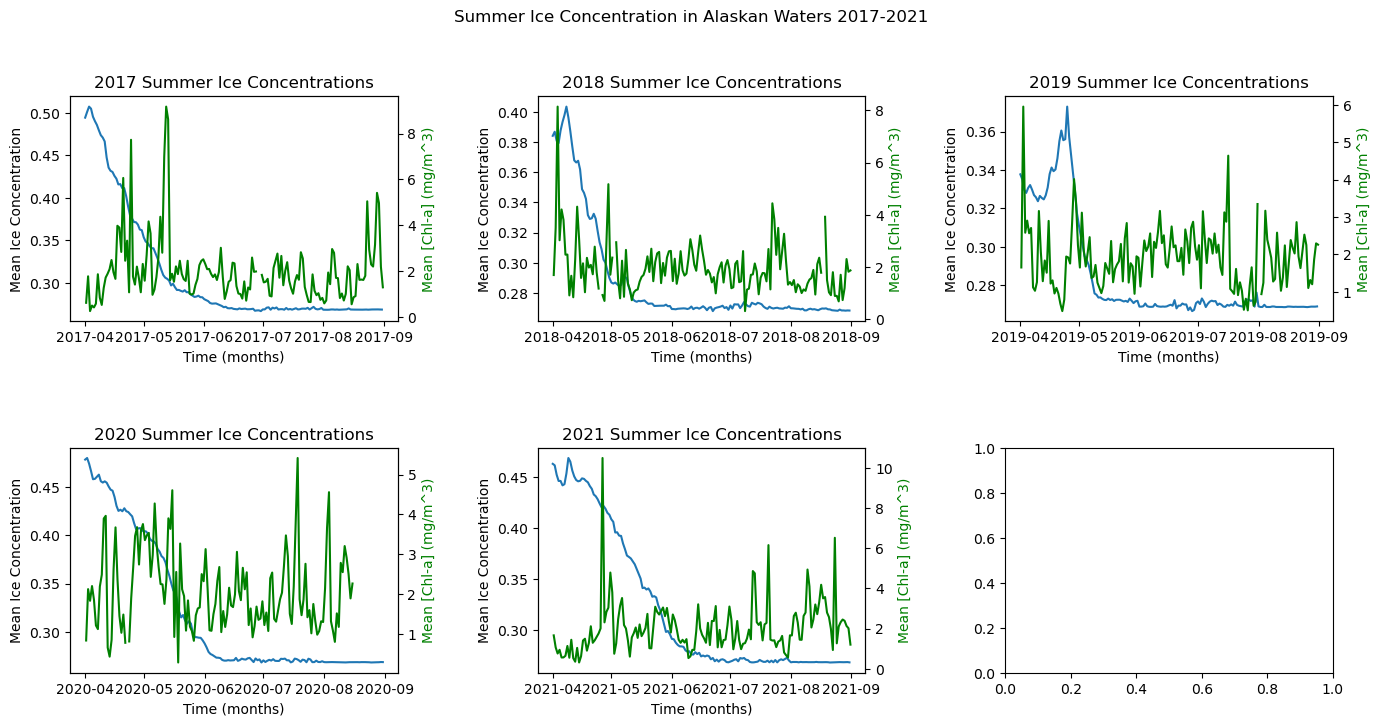

In [369]:
fig, axes = plt.subplots(figsize=(15,8), ncols=3, nrows=2)
fig.tight_layout(pad=7)

axes[0,0].plot(s_ice_2017.time,s_ice_2017)
axes[0,0].set(xlabel="Time (months)", ylabel="Mean Ice Concentration", 
            title="2017 Summer Ice Concentrations")
add_ax1 = axes[0][0].twinx()
add_ax1.plot(s_chl_2017.time, s_chl_2017.chlorophyll, color='g')
add_ax1.set_ylabel('Mean [Chl-a] (mg/m^3)', color='g')

axes[0,1].plot(s_ice_2018.time,s_ice_2018)
axes[0,1].set(xlabel="Time (months)", ylabel="Mean Ice Concentration", 
            title="2018 Summer Ice Concentrations")
add_ax2 = axes[0][1].twinx()
add_ax2.plot(s_chl_2018.time, s_chl_2018.chlorophyll, color='g')
add_ax2.set_ylabel('Mean [Chl-a] (mg/m^3)', color='g')

axes[0,2].plot(s_ice_2019.time,s_ice_2019)
axes[0,2].set(xlabel="Time (months)", ylabel="Mean Ice Concentration", 
            title="2019 Summer Ice Concentrations")
add_ax3 = axes[0][2].twinx()
add_ax3.plot(s_chl_2019.time, s_chl_2019.chlorophyll, color='g')
add_ax3.set_ylabel('Mean [Chl-a] (mg/m^3)', color='g')

axes[1,0].plot(s_ice_2020.time,s_ice_2020)
axes[1,0].set(xlabel="Time (months)", ylabel="Mean Ice Concentration", 
            title="2020 Summer Ice Concentrations")
add_ax4 = axes[1][0].twinx()
add_ax4.plot(s_chl_2020.time, s_chl_2020.chlorophyll, color='g')
add_ax4.set_ylabel('Mean [Chl-a] (mg/m^3)', color='g')

axes[1,1].plot(s_ice_2021.time,s_ice_2021)
axes[1,1].set(xlabel="Time (months)", ylabel="Mean Ice Concentration", 
            title="2021 Summer Ice Concentrations")
add_ax5 = axes[1][1].twinx()
add_ax5.plot(s_chl_2021.time, s_chl_2021.chlorophyll, color='g')
add_ax5.set_ylabel('Mean [Chl-a] (mg/m^3)', color='g')

plt.suptitle("Summer Ice Concentration in Alaskan Waters 2017-2021");

### Here, we see how the timing of the phytoplankton bloom varies interannually, following the decline in sea ice concentration in April-May. The summer of 2019 shows a clear view of this with a high chl-a peak in May as the sea ice concentration rapidly decreases.

## Anomaly Calculations

## Figure 4. Five year sea-ice and chlorophyll-a anomaly comparisons. 

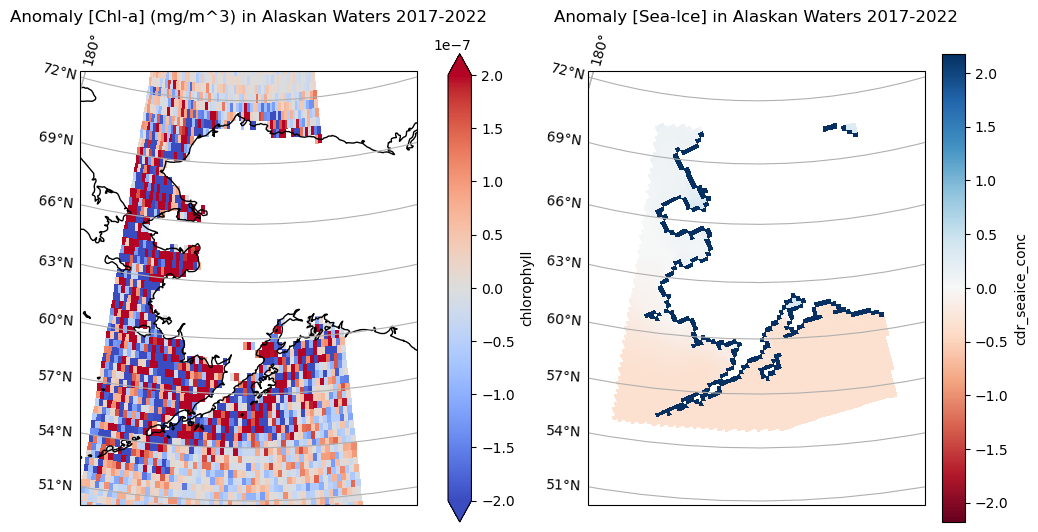

In [474]:
fig=plt.figure(figsize=(10,10),constrained_layout=True)
gs = fig.add_gridspec(2,2, width_ratios=[1,1], height_ratios=[7, 7])

#Chl-a Data
extent_a = [-170, -140, 50, 73]
proj_a =ccrs.LambertConformal(central_longitude=np.mean(extent_a[:2]),central_latitude=np.mean(extent_a[2:]))

ax1 = fig.add_subplot(gs[0], projection=proj_a)                  
ax1.set_extent((extent_a), ccrs.PlateCarree())
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
ax1.coastlines()

#Plot chl data
chl_anom_mean = anom_chl.chlorophyll.mean(dim='time')
chl_anom_mean.plot(transform=ccrs.PlateCarree(), vmin=-0.0000002, vmax=0.0000002, cmap='coolwarm', ax=ax1)
ax1.set_title('Anomaly [Chl-a] (mg/m^3) in Alaskan Waters 2017-2022');

#Ice data
extent_b = [-170, -140, 50, 73]
proj_b = ccrs.LambertConformal(central_longitude=np.mean(extent_b[:2]), central_latitude=np.mean(extent_b[2:]))

ax2 = fig.add_subplot(gs[1], projection=proj_b)
ax2.set_extent((extent_b), ccrs.PlateCarree())
gl2 = ax2.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False

#Plot ice data
ice_anom.plot(transform=ccrs.NorthPolarStereo(central_longitude=-45),cmap='RdBu')
ax2.set_title('Anomaly [Sea-Ice] in Alaskan Waters 2017-2022');

### Note that the scales on the color bars are exponentially small for the chlorophyll-a anomalies which reflects very minor differences in daily values from the 5-year mean. The chlorophyll-a anomalies are too varied and low to suggest any trends, however, the sea-ice anomalies show a distinct trend in concentratios increasing with latitude.

In [373]:
anom_chl = ds_chl - ds_chl.mean(dim='time',skipna=True)
gb_anom_chl = anom_chl.groupby('time.month')
mm_anom_chl = gb_anom_chl.mean(dim=['longitude','latitude'])


anom_ice = alaska_ice - alaska_ice.mean(dim='time',skipna=True)
gb_anom_ice = anom_ice.groupby('time.month')
mm_anom_ice = gb_anom_ice.mean(dim=['xgrid','ygrid'])


In [376]:
anom_chl_2017 = chl_2017 - ds_chl.mean(dim='time',skipna=True)
gb_anom_chl_2017 = anom_chl_2017.groupby('time.month')
mm_anom_chl_2017 = gb_anom_chl_2017.mean(dim=['longitude','latitude'])


anom_ice_2017 = ice_2017 - alaska_ice.mean(dim='time',skipna=True)
gb_anom_ice_2017 = anom_ice_2017.groupby('time.month')
mm_anom_ice_2017 = gb_anom_ice_2017.mean(dim=['xgrid','ygrid'])


In [377]:
s_anom_chl_2017 = s_chl_2017.chlorophyll - ds_chl.chlorophyll.mean()
s_anom_ice_2017 = s_ice_2017 - alaska_ice.mean()

In [378]:
anom_chl_2018 = chl_2018 - ds_chl.mean(dim='time',skipna=True)
gb_anom_chl_2018 = anom_chl_2018.groupby('time.month')
mm_anom_chl_2018 = gb_anom_chl_2018.mean(dim=['longitude','latitude'])

anom_ice_2018 = ice_2018 - alaska_ice.mean(dim='time',skipna=True)
gb_anom_ice_2018 = anom_ice_2018.groupby('time.month')
mm_anom_ice_2018 = gb_anom_ice_2018.mean(dim=['xgrid','ygrid'])


In [379]:
s_anom_chl_2018 = s_chl_2018.chlorophyll - s_chl_2018.chlorophyll.mean()
s_anom_ice_2018 = s_ice_2018 - alaska_ice.mean()

In [380]:
anom_chl_2019 = chl_2019 - ds_chl.mean(dim='time',skipna=True)
gb_anom_chl_2019 = anom_chl_2019.groupby('time.month')
mm_anom_chl_2019 = gb_anom_chl_2019.mean(dim=['longitude','latitude'])

anom_ice_2019 = ice_2019 - alaska_ice.mean(dim='time',skipna=True)
gb_anom_ice_2019 = anom_ice_2019.groupby('time.month')
mm_anom_ice_2019 = gb_anom_ice_2019.mean(dim=['xgrid','ygrid'])


In [381]:
s_anom_chl_2019 = s_chl_2019.chlorophyll - ds_chl.chlorophyll.mean()
s_anom_ice_2019 = s_ice_2019 - alaska_ice.mean()

In [382]:
anom_chl_2020 = chl_2020 - ds_chl.mean(dim='time',skipna=True)
gb_anom_chl_2020 = anom_chl_2020.groupby('time.month')
mm_anom_chl_2020 = gb_anom_chl_2020.mean(dim=['longitude','latitude'])

anom_ice_2020 = ice_2020 - alaska_ice.mean(dim='time',skipna=True)
gb_anom_ice_2020 = anom_ice_2020.groupby('time.month')
mm_anom_ice_2020 = gb_anom_ice_2020.mean(dim=['xgrid','ygrid'])


In [383]:
s_anom_chl_2020 = s_chl_2020.chlorophyll - ds_chl.chlorophyll.mean()
s_anom_ice_2020 = s_ice_2020 - alaska_ice.mean()

In [384]:
anom_chl_2021 = chl_2021 - ds_chl.mean(dim='time',skipna=True)
gb_anom_chl_2021 = anom_chl_2021.groupby('time.month')
mm_anom_chl_2021 = gb_anom_chl_2021.mean(dim=['longitude','latitude'])

anom_ice_2021 = ice_2021 - alaska_ice.mean(dim='time',skipna=True)
gb_anom_ice_2021 = anom_ice_2021.groupby('time.month')
mm_anom_ice_2021 = gb_anom_ice_2021.mean(dim=['xgrid','ygrid'])


In [385]:
s_anom_chl_2021 = s_chl_2021.chlorophyll - ds_chl.chlorophyll.mean()
s_anom_ice_2021 = s_ice_2021 - alaska_ice.mean()

# Figure 5. Annual and Seasonal Anomaly Correlations 

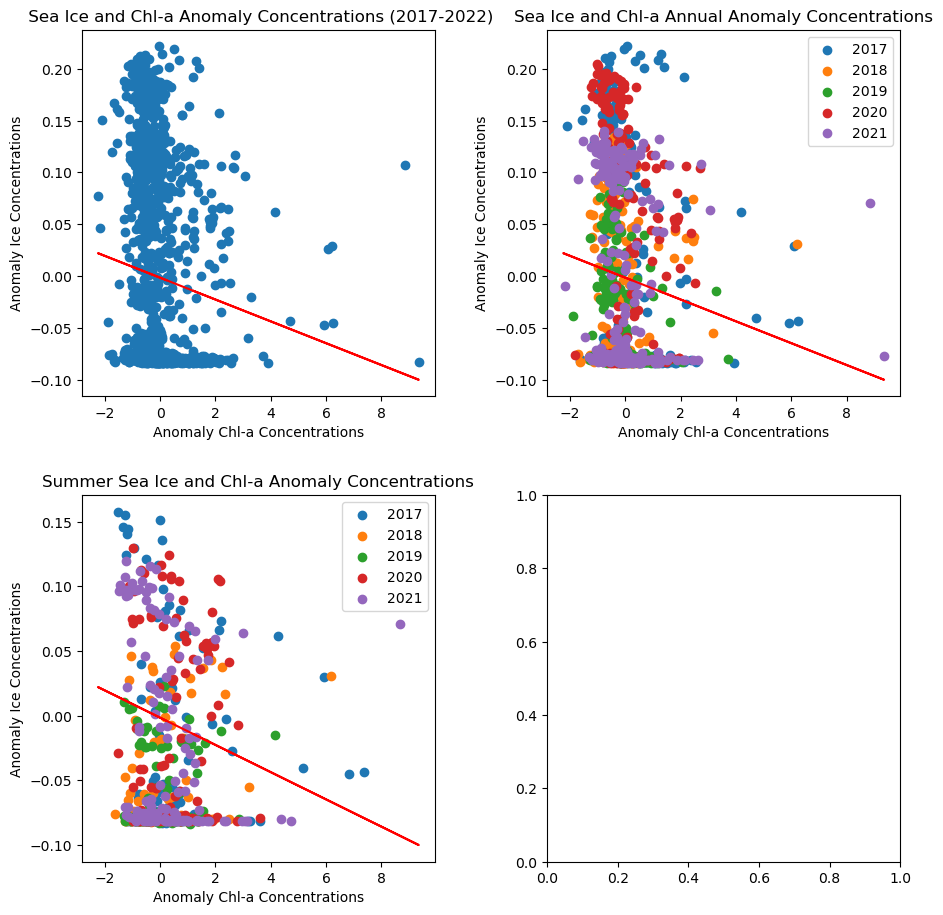

In [462]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.tight_layout(pad=5)

x = mm_anom_chl.chlorophyll.dropna(dim='time')
da_anom_ice = mm_anom_ice.dropna(dim='time')
y = da_anom_ice[1:1489]

#Calculate line
z = np.polynomial.polynomial.polyfit(x,y, 1)
p = np.poly1d(z);

ax[0,0].scatter(mm_anom_chl.chlorophyll, mm_anom_ice[1:1933])
ax[0,0].plot(x,p(x), color='r',linestyle='-')
ax[0,0].set_title(' Sea Ice and Chl-a Anomaly Concentrations (2017-2022)')
ax[0,0].set_xlabel('Anomaly Chl-a Concentrations')
ax[0,0].set_ylabel('Anomaly Ice Concentrations')

#Annual Anom Plot
ax[0,1].scatter(mm_anom_chl_2017.chlorophyll, mm_anom_ice_2017, label='2017')
ax[0,1].scatter(mm_anom_chl_2018.chlorophyll, mm_anom_ice_2018, label='2018')
ax[0,1].scatter(mm_anom_chl_2019.chlorophyll, mm_anom_ice_2019, label='2019')
ax[0,1].scatter(mm_anom_chl_2020.chlorophyll, mm_anom_ice_2020[1:351], label='2020')
ax[0,1].scatter(mm_anom_chl_2021.chlorophyll, mm_anom_ice_2021, label='2021')

ax[0,1].set_title('Sea Ice and Chl-a Annual Anomaly Concentrations')
ax[0,1].set_xlabel('Anomaly Chl-a Concentrations')
ax[0,1].set_ylabel('Anomaly Ice Concentrations')
ax[0,1].legend()
ax[0,1].plot(x,p(x),color='r')

#Summer Anom Plot
ax[1,0].scatter(s_anom_chl_2017, s_anom_ice_2017, label='2017')
ax[1,0].scatter(s_anom_chl_2018, s_anom_ice_2018, label='2018')
ax[1,0].scatter(s_anom_chl_2019, s_anom_ice_2019, label='2019')
ax[1,0].scatter(s_anom_chl_2020, s_anom_ice_2020[1:139], label='2020')
ax[1,0].scatter(s_anom_chl_2021, s_anom_ice_2021, label='2021')

ax[1,0].set_title('Summer Sea Ice and Chl-a Anomaly Concentrations')
ax[1,0].set_xlabel('Anomaly Chl-a Concentrations')
ax[1,0].set_ylabel('Anomaly Ice Concentrations')
ax[1,0].legend()

ax[1,0].plot(x,p(x),color='r');

### Here, we expect to see that when the ice anomaly is low, chl-a will be high and vice versa. The annual correlation suggests that there was no clear, direct relationship between sea-ice and chl-a concentrations. However, the outliers of high chl-a and low sea ice support the expectation. The expected trend is slightly more evident in the summer analysis with a negative slope.

# Regional Analysis: Kotzebue Sound

## Figure 6. Regional Chl-a and Sea-Ice Concentrations

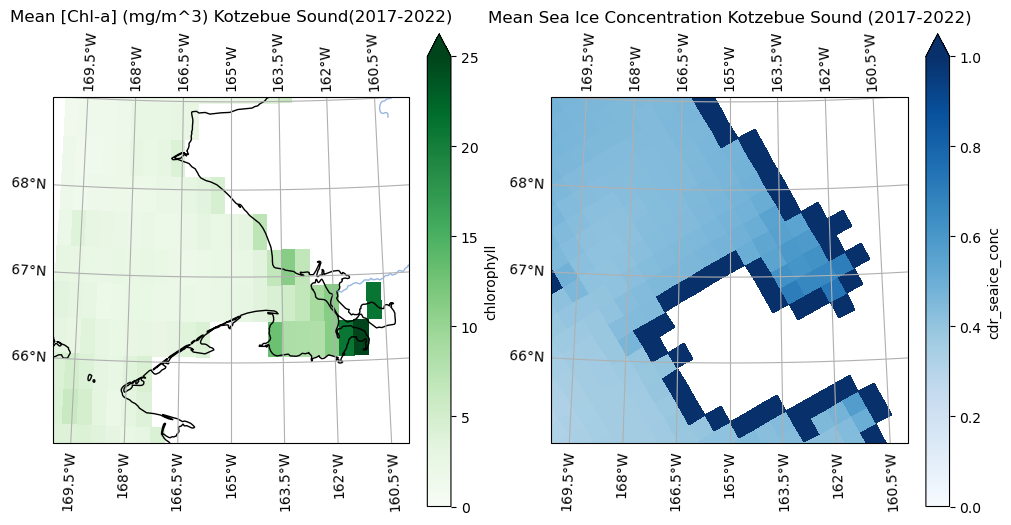

In [472]:
extent_1 = [-170, -160, 65, 69]

fig=plt.figure(figsize=(10,10),constrained_layout=True)
gs = fig.add_gridspec(2,2, width_ratios=[1,1], height_ratios=[7, 7])

#Chl-a Data
proj_1 =ccrs.LambertConformal(central_longitude=np.mean(extent_1[:2]),
                              central_latitude=np.mean(extent_1[2:]))
ax1 = fig.add_subplot(gs[0], projection=proj_1)                  
ax1.set_extent((extent_1), ccrs.PlateCarree())
gl1 = ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl1.right_labels = False
ax1.coastlines()
ax1.add_feature(cartopy.feature.RIVERS)

#Plot chl data
chl_mean = ds_chl.chlorophyll.mean(dim='time')
chl_mean.plot(transform=ccrs.PlateCarree(), vmin=0,vmax=25, cmap='Greens',ax=ax1)

ax1.set_title('Mean [Chl-a] (mg/m^3) Kotzebue Sound(2017-2022)')

#plot ice data
extent_2 = [-170, -160, 65, 69]
proj_2 = ccrs.LambertConformal(central_longitude=np.mean(extent_2[:2]), 
                               central_latitude=np.mean(extent_2[2:]))

ax2 = fig.add_subplot(gs[1], projection=proj_2)
ax2.set_extent((extent_2), ccrs.PlateCarree())
gl2 = ax2.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl2.right_labels = False

#Add ice data to plot
ice_mean = ds_ice.cdr_seaice_conc.mean(dim='time')
ice_mean.plot(transform=ccrs.NorthPolarStereo(central_longitude=-45),vmin=0,vmax=1, cmap='Blues',ax=ax2)
                      
ax2.set_title('Mean Sea Ice Concentration Kotzebue Sound (2017-2022)');

### As may be expected, higher mean chlorophyll concentrations are seen near the coast. Higher ice concentrations are also present. 

## Kotzebue Chl-a Anomalies

In [389]:
#Slice Kotzebue data
kotz_chl = ds_chl.where((ds_chl.latitude > 64) & (ds_chl.latitude < 70) & (ds_chl.longitude > -170) & (ds_chl.longitude < -160),
                        drop=True)
kotz_ice =ds_ice.where((ds_ice.latitude > 64) & (ds_ice.latitude < 70) & (ds_ice.longitude > -170) & (ds_ice.longitude < -160),
                        drop=True)

In [390]:
kotz_anom_chl = kotz_chl - kotz_chl.mean(dim='time',skipna=True)
gb_kotz_anom_chl = kotz_chl.groupby('time.month')
mm_kotz_anom_chl = gb_kotz_anom_chl.mean(dim=['longitude','latitude'])


kotz_anom_ice = kotz_ice - kotz_ice.mean(dim='time',skipna=True)
gb_kotz_anom_ice = kotz_anom_ice.groupby('time.month')
mm_kotz_anom_ice = gb_kotz_anom_ice.mean(dim=['xgrid','ygrid'])

In [391]:
#Calculate the trendline

#Remove nan values
x = mm_kotz_anom_chl.chlorophyll.dropna(dim='time')
da_kotz_anom_ice = mm_kotz_anom_ice.dropna(dim='time')
y = da_anom_ice[1:814]


#Calculate line
z = np.polyfit(x,y, 1)
p = np.poly1d(z)


### Annual anomaly calculations

In [392]:
kotz_chl_2017 = kotz_chl.sel(time=slice('2017-01-01', '2017-12-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2017 = kotz_chl_2017 - kotz_chl.mean()

kotz_chl_2018 = kotz_chl.sel(time=slice('2018-01-01', '2018-12-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2018 = kotz_chl_2018 - kotz_chl.mean()

kotz_chl_2019 = kotz_chl.sel(time=slice('2019-01-01', '2019-12-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2019 = kotz_chl_2019 - kotz_chl.mean()

kotz_chl_2020 = kotz_chl.sel(time=slice('2020-01-01', '2020-12-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2020 = kotz_chl_2020 - kotz_chl.mean()

kotz_chl_2021 = kotz_chl.sel(time=slice('2021-01-01', '2021-12-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2021 = kotz_chl_2021 - kotz_chl.mean()

### Summer anomaly calculations

In [393]:
kotz_chl_2017_s = kotz_chl.sel(time=slice('2017-05-01', '2017-08-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2017_s = kotz_chl_2017_s - kotz_chl.mean()

kotz_chl_2018_s = kotz_chl.sel(time=slice('2018-05-01', '2018-08-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2018_s = kotz_chl_2018_s - kotz_chl.mean()

kotz_chl_2019_s = kotz_chl.sel(time=slice('2019-05-01', '2019-08-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2019_s = kotz_chl_2019_s - kotz_chl.mean()

kotz_chl_2020_s = kotz_chl.sel(time=slice('2020-05-01', '2020-08-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2020_s = kotz_chl_2020_s - kotz_chl.mean()

kotz_chl_2021_s = kotz_chl.sel(time=slice('2021-05-01', '2021-08-31')).mean(dim=['longitude', 'latitude'])
kotz_chl_anom_2021_s = kotz_chl_2021_s - kotz_chl.mean()

## Kotzebue Sea-Ice Anomalies

### Annual anomaly calculations

In [394]:
kotz_ice_2017 = kotz_ice.sel(time=slice('2017-01-01', '2017-12-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2017 = kotz_ice_2017 - kotz_ice.mean()

kotz_ice_2018 = kotz_ice.sel(time=slice('2018-01-01', '2018-12-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2018 = kotz_ice_2018 - kotz_ice.mean()

kotz_ice_2019 = kotz_ice.sel(time=slice('2019-01-01', '2019-12-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2019 = kotz_ice_2019 - kotz_ice.mean()

kotz_ice_2020 = kotz_ice.sel(time=slice('2020-01-01', '2020-12-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2020 = kotz_ice_2020 - kotz_ice.mean()

kotz_ice_2021 = kotz_ice.sel(time=slice('2021-01-01', '2021-12-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2021 = kotz_ice_2021 - kotz_ice.mean()

### Summer anomaly calculations

In [395]:
kotz_ice_2017_s = kotz_ice.sel(time=slice('2017-05-01', '2017-08-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2017_s = kotz_ice_2017_s - kotz_ice.mean()

kotz_ice_2018_s = kotz_ice.sel(time=slice('2018-05-01', '2018-08-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2018_s = kotz_ice_2018_s - kotz_ice.mean()

kotz_ice_2019_s = kotz_ice.sel(time=slice('2019-05-01', '2019-08-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2019_s = kotz_ice_2019_s - kotz_ice.mean()

kotz_ice_2020_s = kotz_ice.sel(time=slice('2020-05-01', '2020-08-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2020_s = kotz_ice_2020_s - kotz_ice.mean()

kotz_ice_2021_s = kotz_ice.sel(time=slice('2021-05-01', '2021-08-31')).mean(dim=['xgrid', 'ygrid'])
kotz_ice_anom_2021_s = kotz_ice_2021_s - kotz_ice.mean()

## Figure 7. Kotzebue Sound Annual and Seasonal Chl-a and Sea-ice Anomalies

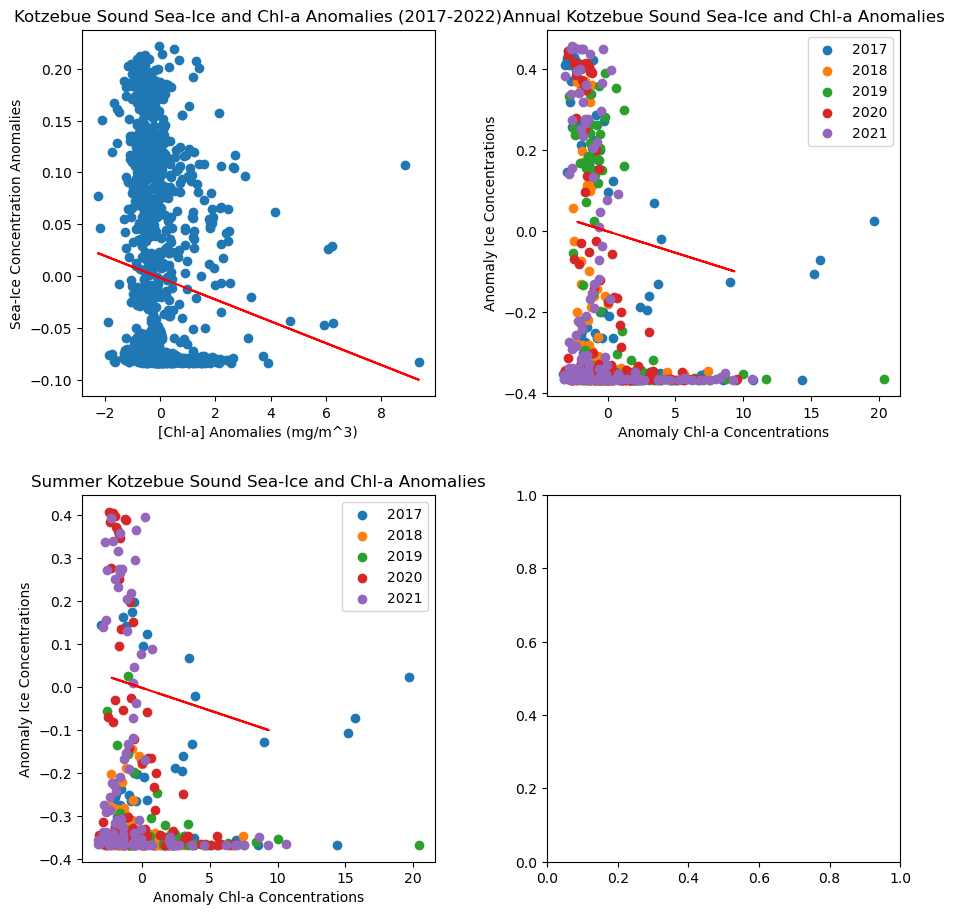

In [466]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.tight_layout(pad=5)

ax[0,0].scatter(mm_anom_chl.chlorophyll, mm_anom_ice[1:1933])
ax[0,0].plot(x,p(x), color='r',linestyle='-')
ax[0,0].set_xlabel('[Chl-a] Anomalies (mg/m^3)')
ax[0,0].set_ylabel('Sea-Ice Concentration Anomalies')
ax[0,0].set_title('Kotzebue Sound Sea-Ice and Chl-a Anomalies (2017-2022)');


#Annual anom plot
ax[0,1].scatter(kotz_chl_anom_2017.chlorophyll, kotz_ice_anom_2017.cdr_seaice_conc, label='2017')
ax[0,1].scatter(kotz_chl_anom_2018.chlorophyll, kotz_ice_anom_2018.cdr_seaice_conc, label='2018')
ax[0,1].scatter(kotz_chl_anom_2019.chlorophyll, kotz_ice_anom_2019.cdr_seaice_conc, label='2019')
ax[0,1].scatter(kotz_chl_anom_2020.chlorophyll, kotz_ice_anom_2020.cdr_seaice_conc[1:351], label='2020')
ax[0,1].scatter(kotz_chl_anom_2021.chlorophyll, kotz_ice_anom_2021.cdr_seaice_conc, label='2021')
ax[0,1].plot(x,p(x), color='r',linestyle='-')
ax[0,1].set_title('Annual Kotzebue Sound Sea-Ice and Chl-a Anomalies')
ax[0,1].set_xlabel('Anomaly Chl-a Concentrations')
ax[0,1].set_ylabel('Anomaly Ice Concentrations')
ax[0,1].legend()


#Summer Anom Plot
ax[1,0].scatter(kotz_chl_anom_2017_s.chlorophyll, kotz_ice_anom_2017_s.cdr_seaice_conc, label='2017')
ax[1,0].scatter(kotz_chl_anom_2018_s.chlorophyll, kotz_ice_anom_2018_s.cdr_seaice_conc, label='2018')
ax[1,0].scatter(kotz_chl_anom_2019_s.chlorophyll, kotz_ice_anom_2019_s.cdr_seaice_conc, label='2019')
ax[1,0].scatter(kotz_chl_anom_2020_s.chlorophyll, kotz_ice_anom_2020_s.cdr_seaice_conc[1:109], label='2020')
ax[1,0].scatter(kotz_chl_anom_2021_s.chlorophyll, kotz_ice_anom_2021_s.cdr_seaice_conc, label='2021')
ax[1,0].plot(x,p(x), color='r',linestyle='-')
ax[1,0].set_title('Summer Kotzebue Sound Sea-Ice and Chl-a Anomalies')
ax[1,0].set_xlabel('Anomaly Chl-a Concentrations')
ax[1,0].set_ylabel('Anomaly Ice Concentrations')
ax[1,0].legend();

## Conclusions: 
### More factors are likely driving the formation of pythoplankton blooms than ice alone. No plot in this analysis shows a correlation between sea-ice and chlorophyll-a concentrations. Outliers in the five year anomaly plots weakly follows the trendline, however is not an indication of any correlation. 

### There is also no notable difference between Kotzebue Sounnd and all of Alaskan waters analyzed here, further suggesting that other factors are contributing to the abundance of chlorophyll-a in this region.